
**DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP**

By - Siddhi Sapre


Exploratory Data Analysis on Global Terrorism dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
df = pd.read_csv("dataset.csv",encoding='ISO-8859-1')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


RENAMING THE KEYS


In [20]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','provstate':'State',
                   'natlty1_txt':'Nationality_of_the_target','weaptype1_txt':'WeaponType','nkill':'Killed','nwound':'Wounded'},inplace=True)

In [23]:
df=df[['year','month','day','Country','Region','city','latitude','longitude','vicinity','suicide','success','State','nationality_of_target','WeaponType','killed','wounded']]

In [24]:
df.head()

,year,month,day,Country,Region,city,latitude,longitude,vicinity,suicide,success,State,nationality_of_target,WeaponType,killed,wounded
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,0,0,1,NaN,Dominican Republic,Unknown,1.0,0.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,0,0,1,Federal,Belgium,Unknown,0.0,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,0,0,1,Tarlac,United States,Unknown,1.0,0.0
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,0,0,1,Attica,United States,Explosives,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,0,0,1,Fukouka,United States,Incendiary,NaN,NaN


In [26]:
df.isnull().sum()


year                        0
month                       0
day                         0
Country                     0
Region                      0
city                      358
latitude                 4044
longitude                4045
vicinity                    0
suicide                     0
success                     0
State                     419
nationality_of_target     518
WeaponType                  1
killed                   6503
wounded                  9794
dtype: int64

In [27]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97074 entries, 0 to 97073
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   97074 non-null  int64  
 1   month                  97074 non-null  int64  
 2   day                    97074 non-null  int64  
 3   Country                97074 non-null  object 
 4   Region                 97074 non-null  object 
 5   city                   96716 non-null  object 
 6   latitude               93030 non-null  float64
 7   longitude              93029 non-null  float64
 8   vicinity               97074 non-null  int64  
 9   suicide                97074 non-null  int64  
 10  success                97074 non-null  int64  
 11  State                  96655 non-null  object 
 12  nationality_of_target  96556 non-null  object 
 13  WeaponType             97073 non-null  object 
 14  killed                 90571 non-null  float64
 15  wo

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,97074.0,1992.529668,10.323087,1.970000e+03,1985.000000,1991.000000,2001.000000,2010.000000
month,97074.0,6.399479,3.378014,0.000000e+00,4.000000,6.000000,9.000000,12.000000
day,97074.0,15.324557,8.815857,0.000000e+00,8.000000,15.000000,23.000000,31.000000
latitude,93030.0,20.868813,22.115284,-5.315461e+01,6.986628,26.444112,36.664438,74.633553
longitude,93029.0,-920.500635,282570.660312,-8.618590e+07,-73.133333,15.732861,51.405190,179.366667
vicinity,97074.0,0.061592,0.264295,-9.000000e+00,0.000000,0.000000,0.000000,1.000000
suicide,97074.0,0.018615,0.135160,0.000000e+00,0.000000,0.000000,0.000000,1.000000
success,97074.0,0.919412,0.272203,0.000000e+00,1.000000,1.000000,1.000000,1.000000
killed,90571.0,2.395579,11.905103,0.000000e+00,0.000000,0.000000,2.000000,1384.000000
wounded,87280.0,3.297479,48.128733,0.000000e+00,0.000000,0.000000,1.000000,8191.000000


TIMEWISE DATA

In [29]:
df['year'].value_counts()


1992    5071
2008    4805
2009    4721
1991    4683
1989    4324
1990    3887
1988    3721
1984    3495
1994    3456
2007    3242
1997    3197
1987    3183
1995    3081
1996    3058
1985    2915
1983    2870
1986    2860
2006    2758
1980    2662
1979    2662
1981    2586
1982    2544
2010    2198
2005    2017
2001    1906
2000    1814
1978    1526
1999    1395
2002    1333
1977    1319
2003    1278
2004    1166
1998     934
1976     923
1975     740
1970     651
1974     581
1972     568
1973     473
1971     471
Name: year, dtype: int64

In [30]:
df['day'].value_counts()


1     3632
15    3475
16    3366
4     3329
12    3321
10    3292
9     3281
20    3271
13    3258
19    3253
28    3230
2     3226
3     3195
17    3182
7     3178
14    3172
18    3172
26    3117
11    3093
27    3085
6     3068
25    3066
23    3060
22    3059
5     3041
8     3040
21    3007
24    2933
29    2855
30    2502
31    1499
0      816
Name: day, dtype: int64

In [31]:
df['day'].value_counts()


1     3632
15    3475
16    3366
4     3329
12    3321
10    3292
9     3281
20    3271
13    3258
19    3253
28    3230
2     3226
3     3195
17    3182
7     3178
14    3172
18    3172
26    3117
11    3093
27    3085
6     3068
25    3066
23    3060
22    3059
5     3041
8     3040
21    3007
24    2933
29    2855
30    2502
31    1499
0      816
Name: day, dtype: int64

COUNTRY WISE DATA

In [32]:
df['Country'].value_counts()


Colombia         7293
Peru             6047
India            5926
Iraq             5817
El Salvador      5320
                 ... 
International       1
St. Lucia           1
North Korea         1
New Hebrides        1
Turkmenistan        1
Name: Country, Length: 204, dtype: int64

In [33]:
df['nationality_of_target'].value_counts()


Colombia                              6923
India                                 6027
Peru                                  5792
Iraq                                  5407
El Salvador                           5212
                                      ... 
St. Lucia                                1
Commonwealth of Independent States       1
Montenegro                               1
Antigua and Barbuda                      1
People's Republic of the Congo           1
Name: nationality_of_target, Length: 209, dtype: int64

In [34]:
killings_per_region=df.groupby(['Region'],as_index=False)['killed']
killings_per_region.sum()

,Region,killed
0,Australasia & Oceania,140.0
1,Central America & Caribbean,28677.0
2,Central Asia,928.0
3,East Asia,546.0
4,Eastern Europe,4315.0
5,Middle East & North Africa,50262.0
6,North America,4527.0
7,South America,27984.0
8,South Asia,49963.0
9,Southeast Asia,11211.0


In [35]:
killings_per_region.max()


,Region,killed
0,Australasia & Oceania,17.0
1,Central America & Caribbean,300.0
2,Central Asia,50.0
3,East Asia,184.0
4,Eastern Europe,344.0
5,Middle East & North Africa,422.0
6,North America,1384.0
7,South America,275.0
8,South Asia,518.0
9,Southeast Asia,116.0


In [36]:
df['killed'].sum()


216970.0

In [37]:
df['wounded'].sum()


287804.0

In [38]:
df['casualities']=df['killed']+df['wounded']
df['casualities'].sum()

481831.0

In [39]:
df1=df.groupby('Region')['casualities'].sum()
df2=df1.to_frame()
df2.reset_index()

,Region,casualities
0,Australasia & Oceania,367.0
1,Central America & Caribbean,34436.0
2,Central Asia,2799.0
3,East Asia,8610.0
4,Eastern Europe,11099.0
5,Middle East & North Africa,139887.0
6,North America,24212.0
7,South America,41011.0
8,South Asia,119863.0
9,Southeast Asia,27760.0


In [40]:
region_and_yearwise_casualitycount=df.groupby(['Region', 'year'])['casualities'].count().head()
region_and_yearwise_casualitycount

Region                 year
Australasia & Oceania  1970    1
                       1971    1
                       1972    8
                       1973    1
                       1974    1
Name: casualities, dtype: int64

**DATA VISUALIZATION**

Text(0, 0.5, 'Casualities')

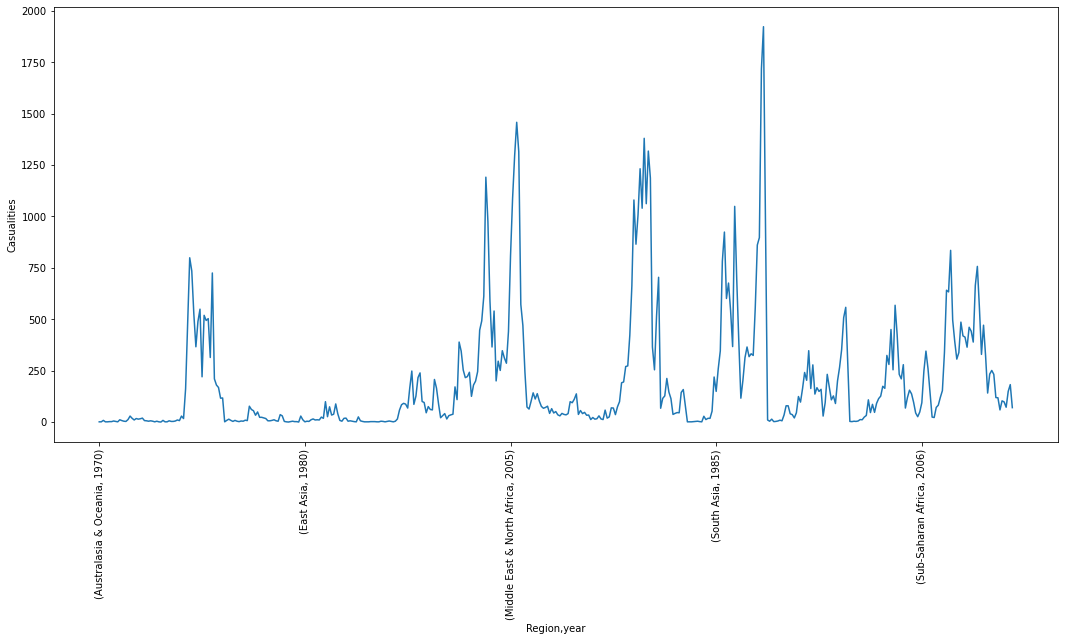

In [41]:
plt.subplots(figsize=(18,8))
df.groupby(['Region', 'year']).count()['casualities'].plot()
plt.xticks(rotation=90)
plt.ylabel("Casualities")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


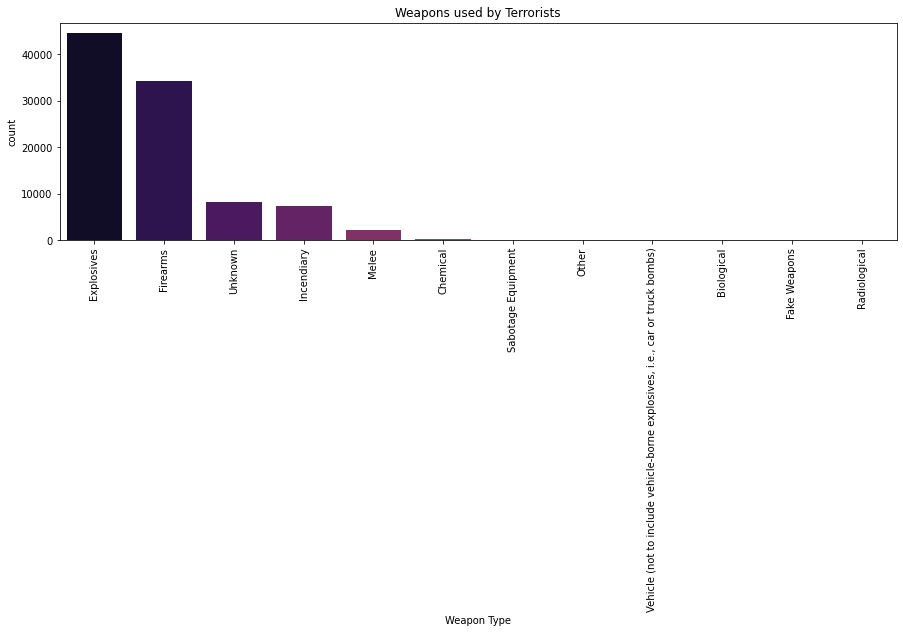

In [42]:
plt.subplots(figsize=(15,4))
sns.countplot('WeaponType',data=df,palette='inferno',order=df['WeaponType'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Weapon Type')
plt.title('Weapons used by Terrorists')
plt.show()

In [44]:
df1=df.sort_values(by='casualities',ascending=False)[:60]
worst=df1.pivot_table(index='Country',columns='year',values='casualities')
worst.fillna(0,inplace=True)

In [45]:
worst.head()


year,1978,1981,1982,1983,1984,1985,1987,1992,1994,1995,1996,1997,1998,2001,2002,2004,2005,2006,2007,2008,2009
Country,,,,,,,,,,,,,,,,,,,,,
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,329.0,0.0,450.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Angola,0.0,0.0,0.0,396.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,419.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,321.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bangladesh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,317.0,0.0,0.0,0.0,0.0,0.0,0.0
Burundi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,389.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


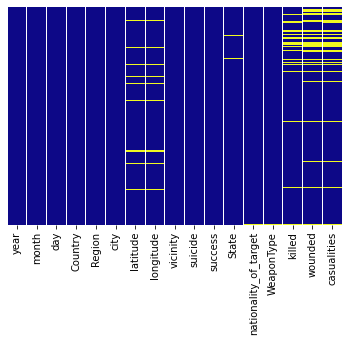

In [50]:
sns.heatmap(df.isnull() , yticklabels=False , cbar=False , cmap='plasma')


In [51]:
missing=df[df.isnull().any(axis=1)]
missing.shape

(14730, 17)

In [52]:
df.shape

(97074, 17)

0    95267
1     1807
Name: suicide, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Suicide Outcome')

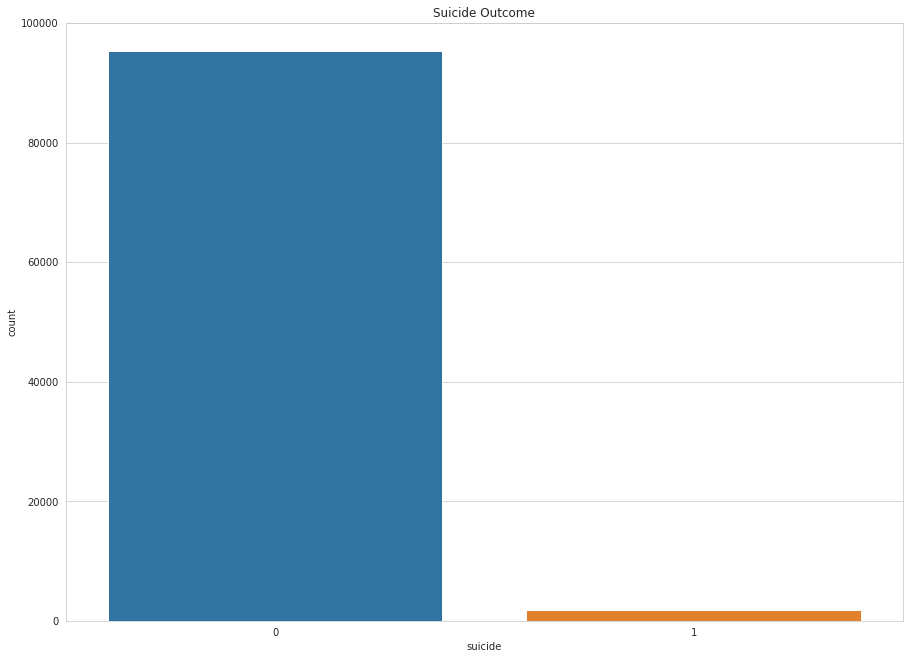

In [54]:
sns.set_style('whitegrid')
print(df.suicide.value_counts())
sns.countplot('suicide',data=df).set_title('Suicide Outcome')

1    89251
0     7823
Name: success, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Success Outcome')

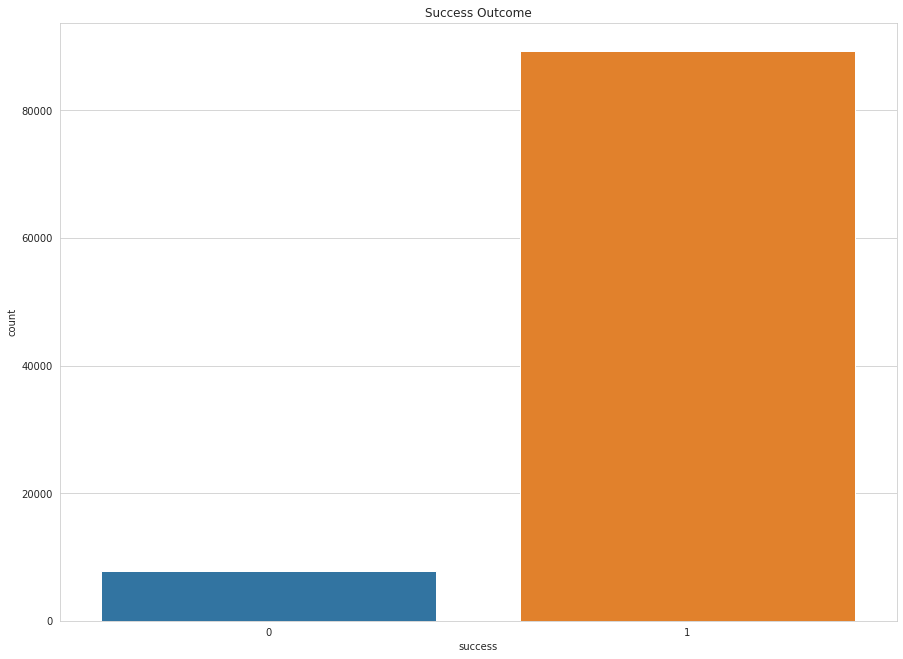

In [55]:
sns.set_style('whitegrid')
print(df.success.value_counts())
sns.countplot('success',data=df).set_title('Success Outcome')

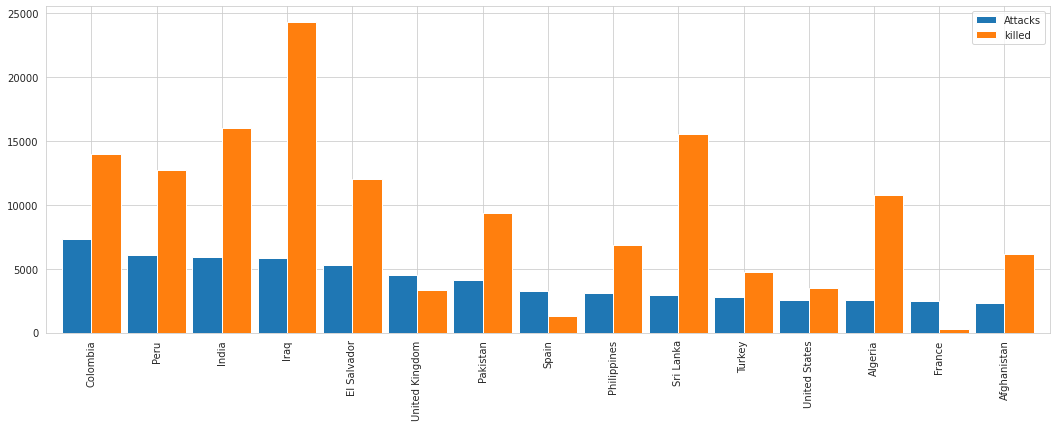

In [75]:
count=df['Country'].value_counts()[:15].to_frame()
count.columns=['Attacks']
data=df.groupby('Country')['killed'].sum().to_frame()
count.merge(data,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()


TOP COUNTRIES AFFECTED

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


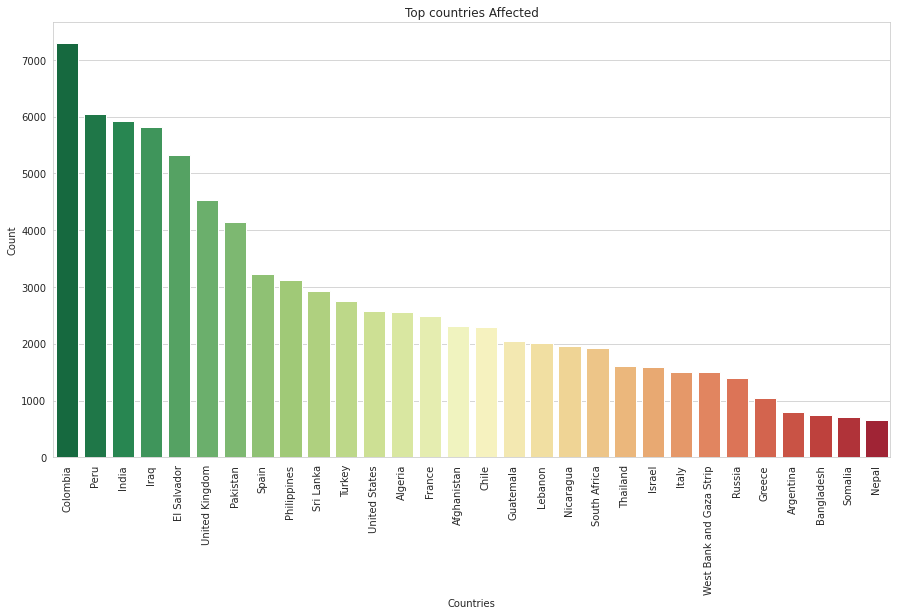

In [74]:
plt.subplots(figsize=(15,8))
sns.barplot(df['Country'].value_counts()[:30].index,df['Country'].value_counts()[:30].values,palette='RdYlGn_r')
plt.title('Top countries Affected')
plt.xticks(rotation=90)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.show()

ACTIVITIES EACH YEAR

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


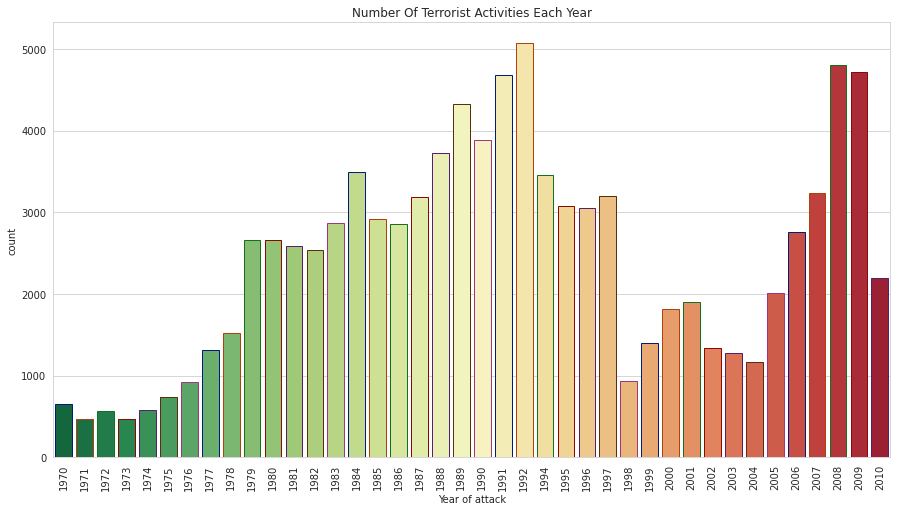

In [73]:
plt.subplots(figsize=(15,8))
sns.countplot('year',data=df,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.xlabel('Year of attack')
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


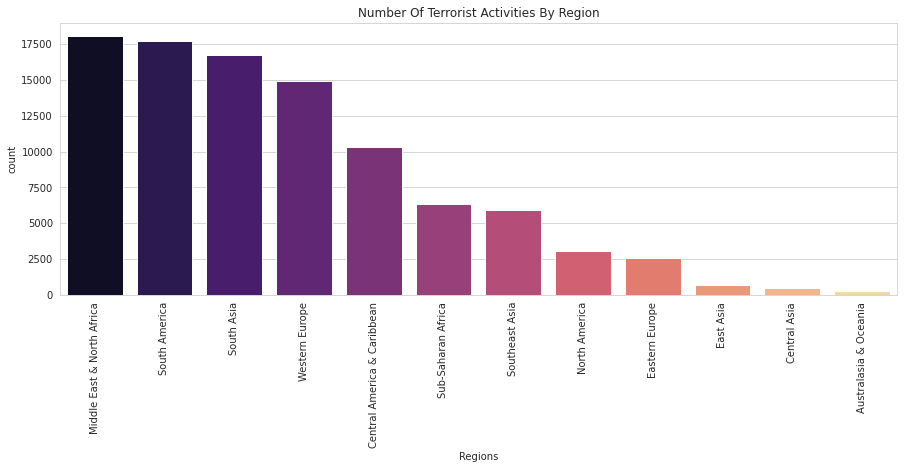

In [62]:
plt.subplots(figsize=(15,5))
sns.countplot('Region',data=df,palette='magma',order=df['Region'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Regions')
plt.title('Number Of Terrorist Activities By Region')
plt.show()

EACH YEAR BY REGION

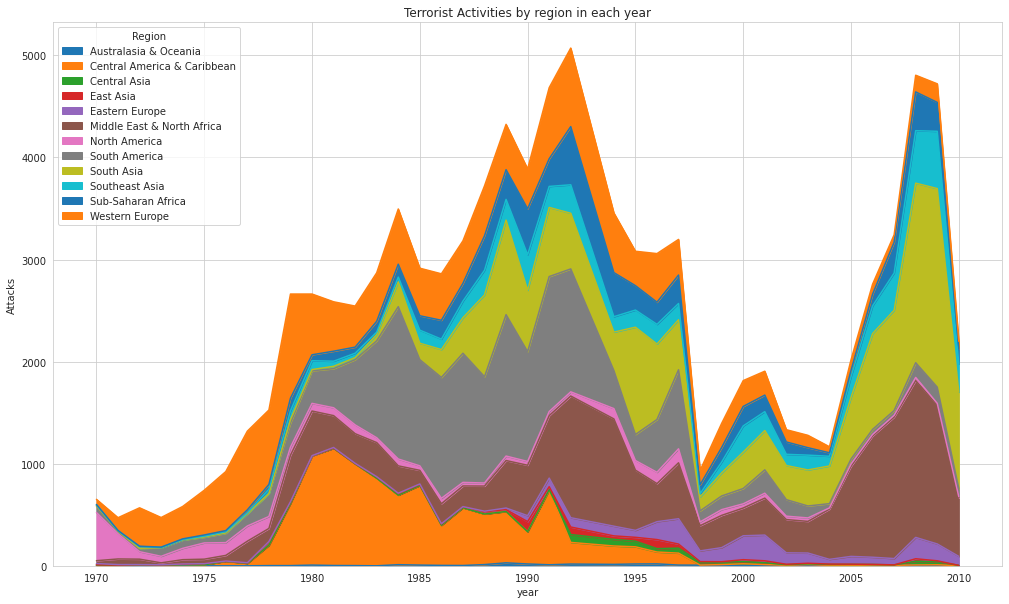

In [64]:
df_region=pd.crosstab(df.year,df.Region).plot(kind='area',figsize=(17,10))
plt.title('Terrorist Activities by region in each year')
plt.ylabel('Attacks')
plt.show()

**CONCLUSION **



1.   Terrorist activities observed a gradual but heavy rise until the mid 1990s and then rose again in the early 2010s.
2.   Countries that were most affected were Columbia, Peru, Iraq and India as the terrorist activities were also prominent there.
3.   Most of the deaths were related to explosives and firearms.

